# Model Selection and Tuning

In [12]:
import numpy as np 
import pandas as pd
import time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Load all datasets that are needed
data = pd.read_csv(f'../final_data/F70_train.csv')
bal_data = pd.read_csv(f'../final_data/B70.csv')
test_data = pd.read_csv(f'../final_data/F70_test.csv')

features = list(data.columns)[:-1]
x = data[features]
# Data needs to be scaled for SVM
x_scaled = preprocessing.scale(x)
y = data[['Response']]

x_bal = bal_data[features]
x_bal_scaled = preprocessing.scale(x_bal)
y_bal = bal_data[['Response']]

x_test = test_data[features]
x_test_scaled = preprocessing.scale(x_test)
y_test = test_data[['Response']]

In [14]:
# Perform Grid search on LogisticRegression using the balanced data set

import warnings
warnings.filterwarnings('ignore')

param_grid = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 10)}

grid_lr = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=StratifiedKFold(3), return_train_score=True, verbose=10, n_jobs=3)
grid_lr.fit(x_bal, y_bal)

estimator = grid_lr.best_estimator_
lr_preds = grid_lr.predict(x_test)
lr_performance = accuracy_score(y_test, lr_preds)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.2s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    7.6s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   17.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   37.0s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   59.0s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  1.1min finished


In [15]:
print(estimator)
print(f'Accuracy of B70: {lr_performance}')

LogisticRegression(C=166.81005372000558, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of B70: 0.39445988044118885


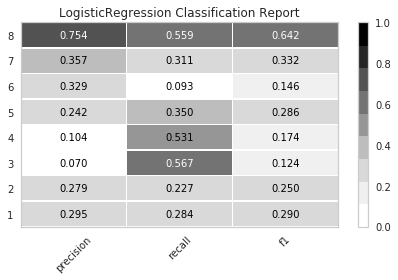

In [16]:
# Visualization to show precision/recall/f1 scores

from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

visualizer = ClassificationReport(LogisticRegression(C=166.81005372000558, penalty='l2', random_state=0), classes=['1', '2', '3','4', '5', '6', '7', '8'],cmap='Greys')
visualizer.fit(x_bal_scaled, y_bal.values.ravel())
visualizer.score(x_test_scaled, y_test)
visualizer.poof()

In [17]:
# Perform Grid search on LogisticRegression using the full data set

param_grid = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 10)}

grid_lr = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=StratifiedKFold(3), return_train_score=True, verbose=10, n_jobs=3)
grid_lr.fit(x, y)

estimator = grid_lr.best_estimator_
lr_preds = grid_lr.predict(x_test)
lr_performance = accuracy_score(y_test, lr_preds)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   10.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   23.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   55.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  9.5min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed: 13.7min
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed: 15.0min finished


In [18]:
print(estimator)
print(f'Accuracy of F70_train: {lr_performance}')

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy of F70_train: 0.46703713058853247


F70_train.csv

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
                   
Accuracy of F70_train: 0.46703713058853247

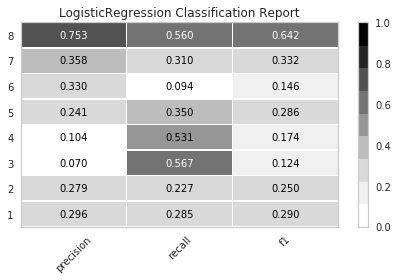

In [19]:
# Visualization to show precision/recall/f1 scores

from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

visualizer = ClassificationReport(LogisticRegression(C=10000.0, penalty='l2', random_state=0), classes=['1', '2', '3','4', '5', '6', '7', '8'],cmap='Greys')
visualizer.fit(x_bal_scaled, y_bal.values.ravel())
visualizer.score(x_test_scaled, y_test)
visualizer.poof()

In [10]:
# Perform Grid search on SVC using the balanced data set

from sklearn.svm import SVC

start_time = time.time()
param_grid_2 = {"kernel": ['poly', 'rbf', 'sigmoid'], "gamma": np.logspace(-6, -1, 5), "C": np.logspace(-4, 4, 10)}

grid_svc = GridSearchCV(SVC(random_state=0), param_grid_2, cv=StratifiedKFold(3), return_train_score=True, verbose=10, n_jobs=3)
grid_svc.fit(x_bal_scaled, y_bal)

svc_estimator = grid_svc.best_estimator_
svc_preds = grid_svc.predict(x_test_scaled)
svc_performance = accuracy_score(y_test, svc_preds)
end_time = time.time()
print(f'Total time: {end_time - start_time} seconds')

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    7.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   17.7s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   29.0s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   44.7s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  4.5min
[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  5.8min
[Parallel(

Total time: 1021.998601436615 seconds


In [11]:
print(svc_estimator)
print(svc_performance)

SVC(C=2.782559402207126, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005623413251903491,
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
0.3583396480592742


B70.csv

preprocessing.scale(x)

SVC(C=2.782559402207126, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005623413251903491,
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
    
0.3583396480592742

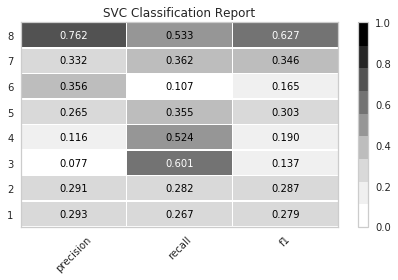

In [8]:
# Visualization to show precision/recall/f1 scores

from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC

visualizer = ClassificationReport(SVC(C=2.782559402207126, cache_size=200, class_weight=None, coef0=0.0,\
    decision_function_shape='ovr', degree=3, gamma=0.005623413251903491,\
    kernel='rbf', max_iter=-1, probability=False, random_state=0,\
    shrinking=True, tol=0.001, verbose=False), classes=['1', '2', '3','4', '5', '6', '7', '8'],cmap='Greys')
visualizer.fit(x_bal_scaled, y_bal.values.ravel())
visualizer.score(x_test_scaled, y_test)
visualizer.poof()

In [2]:
# Perform Grid search on SVC using the full data set

from sklearn.svm import SVC

start_time = time.time()
param_grid_2 = {"gamma": np.logspace(-6, -1, 5), "C": np.logspace(-4, 4, 10)[2:-3]}

grid_svc = GridSearchCV(SVC(random_state=0, kernel='rbf'), param_grid_2, cv=StratifiedKFold(3), return_train_score=True, verbose=15, n_jobs=3)
grid_svc.fit(x_scaled, y)

svc_estimator = grid_svc.best_estimator_
svc_preds = grid_svc.predict(x_test_scaled)
svc_performance = accuracy_score(y_test, svc_preds)
end_time = time.time()
print(f'SVC estimator: {svc_estimator}')
print(f'SVC performance: {svc_performance}')
print(f'Total time: {end_time - start_time} seconds')

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  7.3min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  7.3min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed: 11.9min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed: 15.0min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed: 15.0min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 18.0min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 23.0min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 23.0min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 24.2min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed: 31.1min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 31.1min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed: 32.2min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed: 38.3min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed: 41.3min
[Parallel(

SVC estimator: SVC(C=2.782559402207126, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005623413251903491,
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
SVC performance: 0.4954112991496169
Total time: 12688.811497926712 seconds


F70_train.csv

preprocessing.scale(x)

SVC estimator: SVC(C=2.782559402207126, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005623413251903491,
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
    
SVC performance: 0.4954112991496169

Total time: 12688.811497926712 seconds

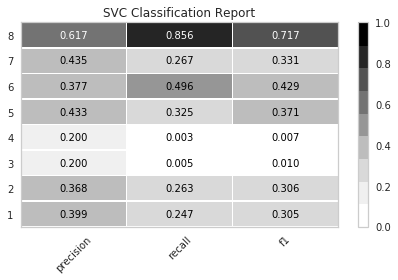

In [6]:
# Visualization to show precision/recall/f1 scores

from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC

visualizer = ClassificationReport(SVC(C=2.782559402207126, cache_size=200, class_weight=None, coef0=0.0,\
    decision_function_shape='ovr', degree=3, gamma=0.005623413251903491,\
    kernel='rbf', max_iter=-1, probability=False, random_state=0,\
    shrinking=True, tol=0.001, verbose=False), classes=['1', '2', '3','4', '5', '6', '7', '8'],cmap='Greys')
visualizer.fit(x_scaled, y.values.ravel())
visualizer.score(x_test_scaled, y_test)
visualizer.poof()